# Fuel Economy - Regularized Linear Models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge
import numpy as np

sns.set_style("whitegrid")

In [2]:
X_train = pd.read_excel("./data/carEcon.xlsx", sheet_name='XTrain', header=None)
X_test = pd.read_excel("./data/carEcon.xlsx", sheet_name='XTest', header=None)
y_train = pd.read_excel("./data/carEcon.xlsx", sheet_name='econTrain', header=None)
y_test = pd.read_excel("./data/carEcon.xlsx", sheet_name='econTest', header=None)

## Ridge

Fit ridge model.

In [3]:
alphas_ridge = range(0, 301)
coefs = []
intercepts = []
for a in alphas_ridge:
    regressor = Ridge(alpha=a)
    regressor.fit(X_train, y_train)
    coefs.append(regressor.coef_)
    intercepts.append(regressor.intercept_)

Calculate and plot MSE. Find smallest MSE.

Minimum MSE:
 MSE = 1.0219818606267923 at lambda = 25


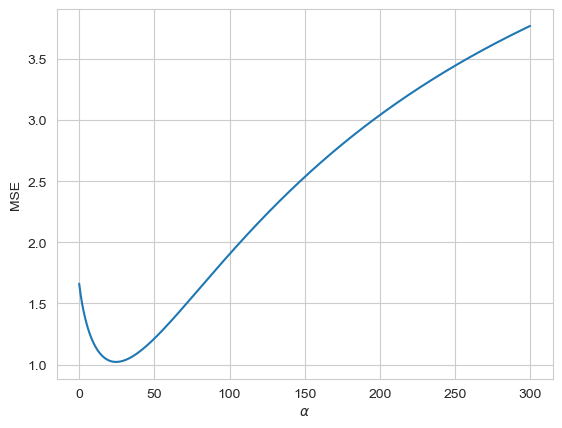

In [4]:
y_pred = np.array(intercepts).T + X_test.dot(np.concatenate(coefs).T)
error = y_pred - y_test.to_numpy().reshape(-1, 1)
MSE = np.mean(error**2, axis=0)
idx = MSE.argmin()
print(f"Minimum MSE:\n MSE = {MSE[idx]} at lambda = {alphas_ridge[idx]}")

plt.figure()
plt.plot(MSE)
plt.xlabel("$\\alpha$")
plt.ylabel("MSE")
plt.show()

## Lasso

Fit lasso model.

In [5]:
alphas_lasso = np.arange(1, 301) / len(y_train)
coefs = []
intercepts = []
for a in alphas_lasso:
    regressor = Lasso(alpha=a)
    regressor.fit(X_train, y_train)
    coefs.append(regressor.coef_)
    intercepts.append(regressor.intercept_)

Calculate and plot MSE. Find smallest MSE.

Minimum MSE:
 MSE = 0.9465539859266112 at lambda = 0.09313725490196079


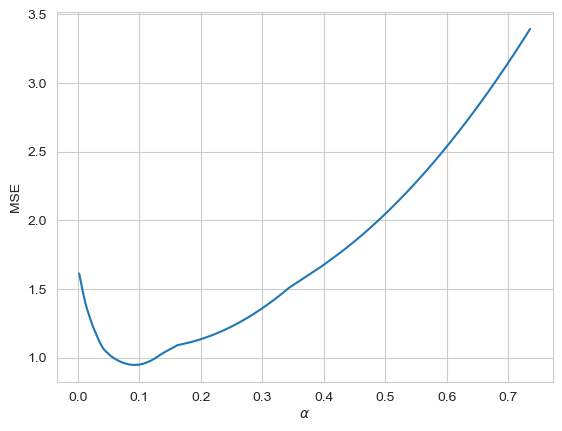

In [6]:
y_pred = np.array(intercepts).T + X_test.dot(np.concatenate(coefs).reshape(-1, X_test.shape[1]).T)
error = y_pred - y_test.to_numpy().reshape(-1, 1)
MSE = np.mean(error**2, axis=0)
idx = MSE.argmin()
print(f"Minimum MSE:\n MSE = {MSE[idx]} at lambda = {alphas_lasso[idx]}")

plt.figure()
plt.plot(alphas_lasso, MSE)
plt.xlabel("$\\alpha$")
plt.ylabel("MSE")
plt.show()